In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.sql import text

In [ ]:
df_googleads = pd.read_csv('/content/drive/MyDrive/my_db/Sample Data - FB & Adwords - Raw Export - Google Ads - Campaigns.csv')
df_fb = pd.read_csv('/content/drive/MyDrive/my_db/Sample Data - FB & Adwords - Raw Export - FB - Raw.csv')

In [ ]:
#create db engine
my_conn=create_engine("sqlite:////content/drive/MyDrive/my_db/my_db.db")

In [ ]:
#creating googleads table
df_googleads.to_sql('googleads', my_conn,if_exists='replace',index=False)
#creating fb table
df_fb.to_sql('fb', my_conn,if_exists='replace',index=False)

# **FB**

In [ ]:
#performance results by date
sql = '''
    SELECT date_start,count(distinct (campaign_id)) as unique_campaign,sum(clicks) as total_clicks,avg(cpm) as avg_cpm,avg(cpc) as avg_cpc ,sum(spend) as total_spend,avg(spend) as avg_spend
    ,sum(conversions) as total_conversion FROM fb group by (date_start);
'''

query = my_conn.execute(text(sql))         
df_f = pd.DataFrame(query.fetchall(),columns=query.keys())
df_f


,date_start,unique_campaign,total_clicks,avg_cpm,avg_cpc,total_spend,avg_spend,total_conversion
0,2020-07-04 0:00:00,10,979,52.570586,4.341539,2648.99,44.898136,17.90
1,2020-07-05 0:00:00,10,1447,39.847071,3.752886,3296.17,52.320159,24.95
2,2020-07-06 0:00:00,10,535,48.493558,3.773824,1259.56,22.097544,25.03
3,2020-07-07 0:00:00,8,1560,33.191998,4.153875,3773.07,67.376250,27.90
4,2020-07-08 0:00:00,8,1613,34.657052,4.286028,3875.24,69.200714,38.28
5,2020-07-09 0:00:00,8,1139,32.990663,4.066112,3316.59,59.224821,40.50
6,2020-07-10 0:00:00,7,1007,34.402925,3.643082,2864.54,56.167451,33.10
7,2020-07-11 0:00:00,7,873,36.135749,3.411798,2580.37,50.595490,21.55
8,2020-07-12 0:00:00,7,1110,36.845914,3.706383,2687.26,57.175745,29.10
9,2020-07-13 0:00:00,7,817,34.003341,3.398557,2223.95,35.300794,55.50


Text(0, 0.5, 'Clicks')

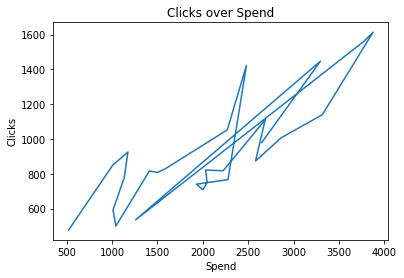

In [ ]:
plt.plot(df_f['total_spend'], df_f['total_clicks'])
plt.title('Clicks over Spend')
plt.xlabel('Spend')
plt.ylabel('Clicks')

In [ ]:
#performance results by campaigns

sql = '''
    SELECT campaign_name,count(distinct (date_start)) as days_active,sum(clicks) as total_clicks,avg(cpm) as avg_cpm,avg(cpc) as avg_cpm ,sum(spend) as total_spend,avg(spend) as avg_spend
    ,sum(conversions) as total_conversion FROM fb group by (campaign_name);
'''

query = my_conn.execute(text(sql))         
df_f = pd.DataFrame(query.fetchall(),columns=query.keys())
df_f


,campaign_name,days_active,total_clicks,avg_cpm,avg_cpm,total_spend,avg_spend,total_conversion
0,02_Prospecting_CBO_BidCaps_CH_6.29.20 [PROS],20,2741,24.776107,3.322366,6090.04,43.191773,98.95
1,02_Prospecting_CBO_BidCaps_OGCreative_6.9.2020...,16,1405,15.220572,3.804673,4193.83,35.540932,61.61
2,02_Prospecting_CostCaps$500_5.12.2020 [PROS],25,7549,19.349181,2.735197,17412.96,110.208608,84.90
3,02_Prospecting_LC_Broad_6.30.2020 [PROS],6,2512,21.778575,2.335791,4946.41,206.100417,6.73
4,02_Prospecting_LC_Broad_Narrative [PROS],11,6261,27.449527,1.172701,5712.33,35.044969,117.67
5,04_Remarketing_BOFU(optimize=PUR)_5.16.2020 [RT],3,0,39.346320,NaN,3.56,0.209412,6.95
6,04_Remarketing_BOFU_3.31.2020 [RT],26,568,74.931225,4.388528,2291.94,34.208060,44.95
7,04_Remarketing_BOFU_CH_6.29.20 [RT],3,9,109.908443,1.438889,49.41,2.906471,3.40
8,04_Remarketing_Content_ATC/IC_4.10.2020 [RT],26,478,98.176490,8.557450,4153.12,29.665143,66.07
9,04_Remarketing_Content_Visitors_4.30.2020 [RT],16,381,36.007763,2.891575,933.41,14.584531,29.25


Text(0, 0.5, 'Clicks')

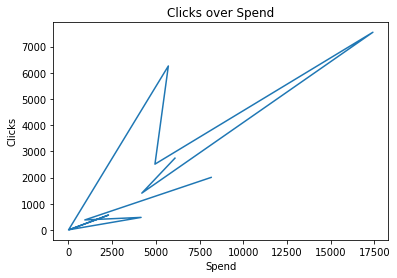

In [ ]:
plt.plot(df_f['total_spend'], df_f['total_clicks'])
plt.title('Clicks over Spend')
plt.xlabel('Spend')
plt.ylabel('Clicks')

In [ ]:
#performance results with percentage contribution by campaign type, PROS vs RT
#.created campaign type with RT and PROS
#.selected performance results
#.calculated total spend
#.joined over 'extra' column for calculating percentage contribution of each campaign type

sql = '''
With clean_data as (

select case when lower(campaign_name) like '%rt%' then "RT" 
    when lower(campaign_name) like '%pros%' then "PROS" end as campaign_type,* FROM fb),

Total_spend_ct as (
SELECT campaign_type,
    count(distinct (date_start)) as days_active,sum(clicks) as total_clicks,avg(cpm) as avg_cpm,avg(cpc) as avg_cpm ,sum(spend) as total_spend,avg(spend) as avg_spend
    ,sum(conversions) as total_conversion ,1 as extra
From clean_data
group by campaign_type ),

Total_spendd as (
Select sum(spend) as total, 1 as extra
From clean_data
)

Select *,total_spend/total*100 as percentage_contribution
From Total_spend_ct 
Inner join Total_spendd on Total_spendd.extra = Total_spend_ct.extra;
'''

query = my_conn.execute(text(sql))         
df_f = pd.DataFrame(query.fetchall(),columns=query.keys())
df_f


,campaign_type,days_active,total_clicks,avg_cpm,avg_cpm:1,total_spend,avg_spend,total_conversion,extra,total,extra,percentage_contribution
0,PROS,26,20468,22.092033,2.627920,38355.57,63.502599,369.86,1,53947.43,1,71.098049
1,RT,26,3441,69.620373,5.640428,15591.86,39.373384,211.16,1,53947.43,1,28.901951


Text(0, 0.5, 'Conversions')

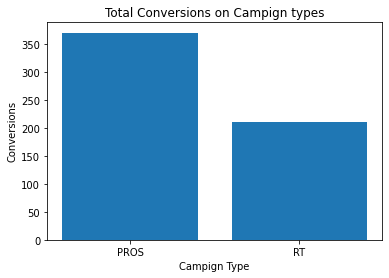

In [ ]:
plt.bar(df_f['campaign_type'], df_f['total_conversion'])
plt.title('Total Conversions on Campign types')
plt.xlabel('Campign Type')
plt.ylabel('Conversions')

# **Google**

In [ ]:
#performance results by date
sql = '''
    SELECT day,count(distinct (campaign)) as unique_campaign,sum(clicks) as total_clicks,avg(ctr) as avg_ctr,sum(cost) as total_spend,sum(convrate) as total_convrate
    ,sum(conversions) as total_conversion FROM googleads group by (day);
'''

query = my_conn.execute(text(sql))         
df_g = pd.DataFrame(query.fetchall(),columns=query.keys())
df_g


,day,unique_campaign,total_clicks,avg_ctr,total_spend,total_convrate,total_conversion
0,2020-06-19 0:00:00,10,78,4.774000,310358890,23.70,1.40
1,2020-06-20 0:00:00,23,1874,8.293913,3309692186,46.38,6.90
2,2020-06-21 0:00:00,23,1973,8.546522,3349100179,13.63,9.60
3,2020-06-22 0:00:00,23,2033,6.795217,3249406156,28.22,11.58
4,2020-06-23 0:00:00,23,1913,5.780870,2329823780,65.19,10.97
5,2020-06-24 0:00:00,22,1437,7.232727,1925171097,30.40,4.93
6,2020-06-25 0:00:00,21,1438,6.663810,2228187945,29.11,7.30
7,2020-06-26 0:00:00,23,2058,8.813913,2136154653,23.19,6.30
8,2020-06-27 0:00:00,22,1319,6.694545,2096086224,40.58,11.40
9,2020-06-28 0:00:00,20,1846,7.379000,2216207301,47.12,13.10


Text(0, 0.5, 'Clicks')

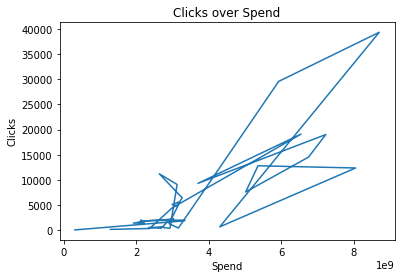

In [ ]:
plt.plot(df_g['total_spend'], df_g['total_clicks'])
plt.title('Clicks over Spend')
plt.xlabel('Spend')
plt.ylabel('Clicks')

In [ ]:
#performance results by campaigns

sql = '''
    SELECT campaign,count(distinct (day)) as days_active,sum(clicks) as total_clicks,avg(ctr) as avg_ctr,sum(cost) as total_spend,sum(convrate) as total_convrate
    ,sum(conversions) as total_conversion FROM googleads group by (campaign);
'''

query = my_conn.execute(text(sql))         
df_g = pd.DataFrame(query.fetchall(),columns=query.keys())
df_g


,campaign,days_active,total_clicks,avg_ctr,total_spend,total_convrate,total_conversion
0,DAC-Generic ZZZ[pros],13,0,0.000000,0,0.00,0.00
1,DAC-Generic-Affinity/InMarket [pros],12,64961,1.102500,5603668514,0.05,2.00
2,DAC-Generic-Custom Intent [pros],37,20136,2.575676,7928026755,0.32,4.00
3,DAC-Retargeting [rt],34,573,1.728235,1277306524,11.80,4.00
4,GMA-Custom Intent [pros],38,32177,5.922632,7133366407,0.00,0.00
5,GMA-In-Market/Affinity [pros],20,57233,47.665000,2532516964,0.00,0.00
6,GMA-Retargeting [rt],40,51696,14.817000,2623566385,17.95,2.00
7,PS-Brand-Sample-Compare To [brand],40,159,8.600000,1687300000,82.34,4.00
8,PS-Brand-Sample-Product Sizes [brand],41,184,24.553415,1522490000,122.93,5.85
9,PS-Brand-Sample-Reviews [brand],41,536,12.759024,7343980000,458.52,58.19


Text(0, 0.5, 'Clicks')

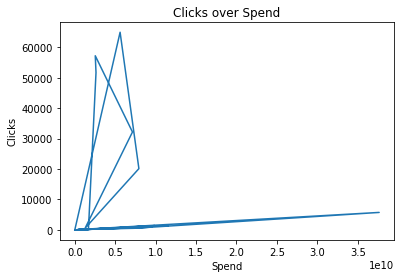

In [ ]:
plt.plot(df_g['total_spend'], df_g['total_clicks'])
plt.title('Clicks over Spend')
plt.xlabel('Spend')
plt.ylabel('Clicks')

In [ ]:
#performance results with percentage contribution by campaign type, PROS vs RT
#.created campaign type with RT and PROS
#.selected performance results
#.calculated total spend
#.joined over 'extra' column for calculating percentage contribution of each campaign type

sql = '''
With clean_data as (

select case when lower(campaign) like '%rt%' then "RT" 
    when lower(campaign) like '%pros%' then "PROS" 
    when lower(campaign) like '%brand%' then "BRAND" end as campaign_type,* FROM googleads),

Total_spend_ct as (
SELECT campaign_type,
    count(distinct (day)) as days_active,sum(clicks) as total_clicks,avg(ctr) as avg_ctr,sum(cost) as total_spend,sum(convrate) as total_convrate
    ,sum(conversions) as total_conversion ,1 as extra
From clean_data
group by campaign_type ),

Total_spendd as (
Select sum(cost) as total, 1 as extra
From clean_data
)

Select *,total_spend/total*100 as percentage_contribution
From Total_spend_ct 
Inner join Total_spendd on Total_spendd.extra = Total_spend_ct.extra;
'''

query = my_conn.execute(text(sql))         
df_g = pd.DataFrame(query.fetchall(),columns=query.keys())
df_g


,campaign_type,days_active,total_clicks,avg_ctr,total_spend,total_convrate,total_conversion,extra,total,extra,percentage_contribution
0,BRAND,41,6771,15.771294,48887740000,957.42,323.73,1,143490361549,1,0
1,PROS,41,182868,4.868177,90701748640,1447.32,237.74,1,143490361549,1,0
2,RT,41,52269,8.685867,3900872909,29.75,6.00,1,143490361549,1,0


Text(0, 0.5, 'Conversions')

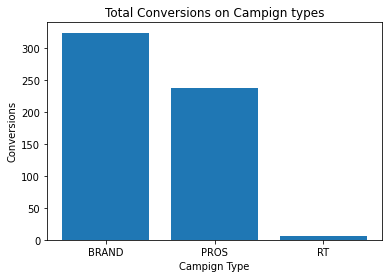

In [ ]:
plt.bar(df_g['campaign_type'], df_g['total_conversion'])
plt.title('Total Conversions on Campign types')
plt.xlabel('Campign Type')
plt.ylabel('Conversions')